In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = os.listdir('data')
files = [f for f in files if f[0].isdigit()]

In [3]:
data = None
for f in files:
    new = pd.read_csv('data/'+f, index_col=0)
    if data is None:
        data = new
    else:
        data = data.append(new)

In [4]:
data.columns

Index(['alpha', 'subset', 'alpha_sim', 'alpha_sep', 'alpha_sim_err',
       'alpha_sep_err', 'beta', 'beta_sim', 'beta_sep', 'beta_sim_err',
       'beta_sep_err', 'gamma', 'gamma_sim', 'gamma_sep', 'gamma_sim_err',
       'gamma_sep_err', 'sig_int', 'sig_int_sim', 'sig_int_sep',
       'sig_int_sim_err', 'sig_int_sep_err'],
      dtype='object')

In [5]:
data.sig_int.max()

0.1

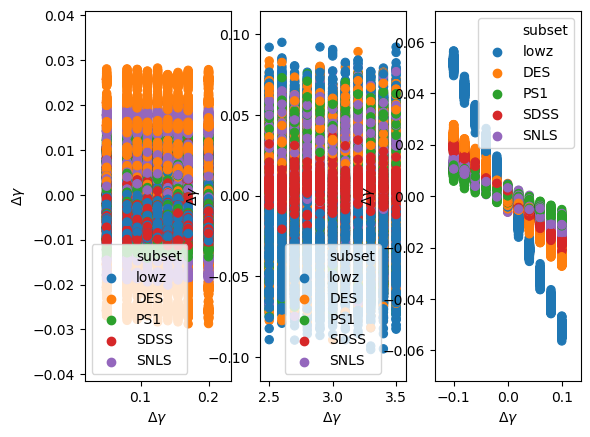

In [6]:
for i, param in enumerate(['alpha', 'beta', 'gamma']):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data[param], data[param+'_sep']-data[param], hue=data.subset, edgecolor=None)
    plt.xlabel('$\Delta\\gamma$')
    plt.ylabel('$\Delta\\gamma$')

Text(0, 0.5, '$\\Delta\\gamma$')

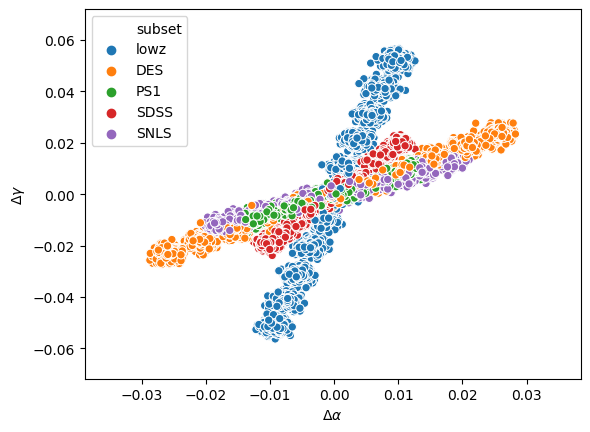

In [7]:
sns.scatterplot(data.alpha_sep-data.alpha, data.gamma_sep-data.gamma, hue=data.subset)
plt.xlabel('$\Delta\\alpha$')
plt.ylabel('$\Delta\\gamma$')

Text(0, 0.5, '$\\Delta\\gamma$')

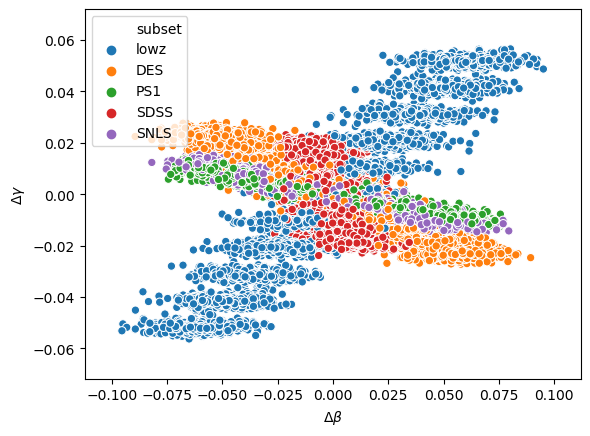

In [8]:
sns.scatterplot(data.beta_sep-data.beta, data.gamma_sep-data.gamma, hue=data.subset)
plt.xlabel('$\Delta\\beta$')
plt.ylabel('$\Delta\gamma$')

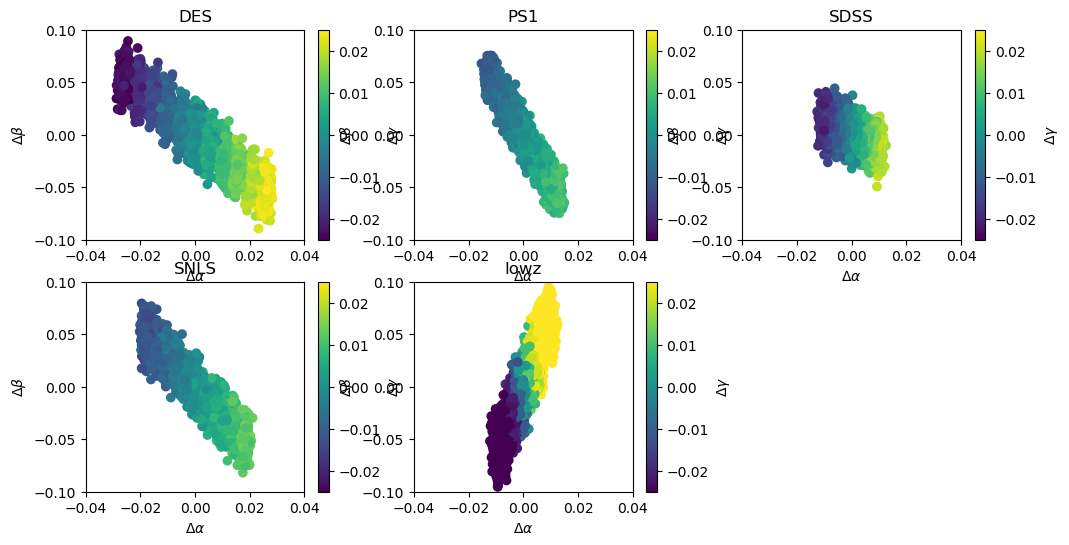

In [9]:
plt.figure(figsize=(12, 6))
for i, (subset, d) in enumerate(data.groupby('subset')):
    plt.subplot(2, 3, i+1)
    plt.scatter(d.alpha_sep-d.alpha, d.beta_sep-d.beta, c=d.gamma_sep-d.gamma,
                vmin=-0.025, vmax=0.025)
    plt.colorbar(label='$\Delta\gamma$')
    plt.xlabel('$\Delta\\alpha$')
    plt.ylabel('$\Delta\\beta$')
    plt.title(subset)
    plt.xlim(-0.04, 0.04)
    plt.ylim(-0.1, 0.1)

In [10]:
from sklearn.linear_model import LinearRegression

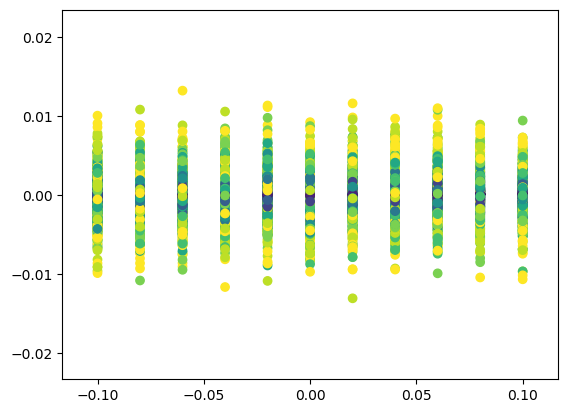

In [11]:
l = LinearRegression()
l.fit(d[['alpha_sep', 'beta_sep', 'gamma_sep', 'sig_int_sep']], d['gamma'])
plt.scatter(d['gamma'], d['gamma']-l.predict(d[['alpha_sep', 'beta_sep', 'gamma_sep', 'sig_int_sep']]),
            c=d.sig_int)

In [12]:
l.coef_, l.intercept_

(array([-1.82227963e-04,  2.40485682e-05,  2.07167041e+00,  3.52488270e-04]),
 -8.036776698288427e-05)

In [13]:
feature_list = ['alpha_sep', 'beta_sep', 'gamma_sep']
coefs = {}
resids = {}
for subset_name, subset in data.groupby('subset'):
    subset_coefs = {}
    subset_resids = {}
    for param_name in ['alpha', 'beta', 'gamma']:
        model = LinearRegression()
        model.fit(subset[feature_list], subset[param_name])
        subset_coefs[param_name] = [model.intercept_, *model.coef_]
        subset_resids[param_name] = np.std(subset[param_name] - model.predict(subset[feature_list]))
    coefs[subset_name] = subset_coefs
    resids[subset_name] = subset_resids

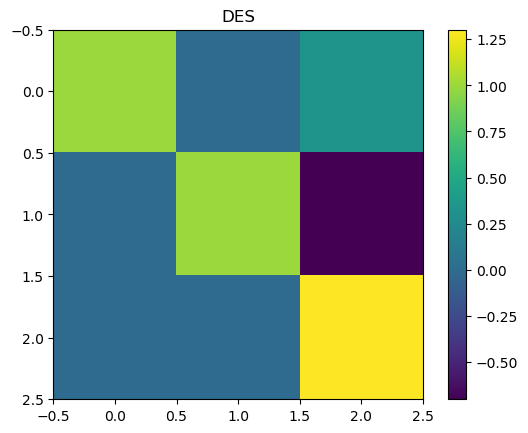

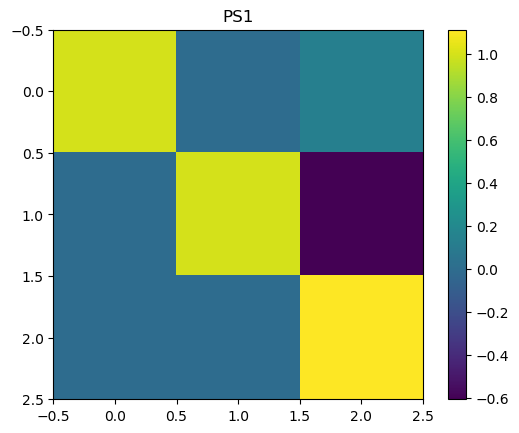

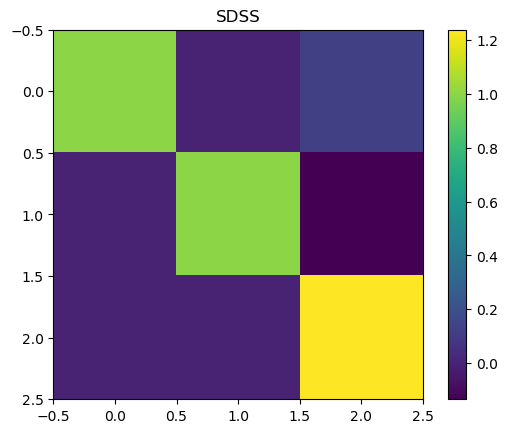

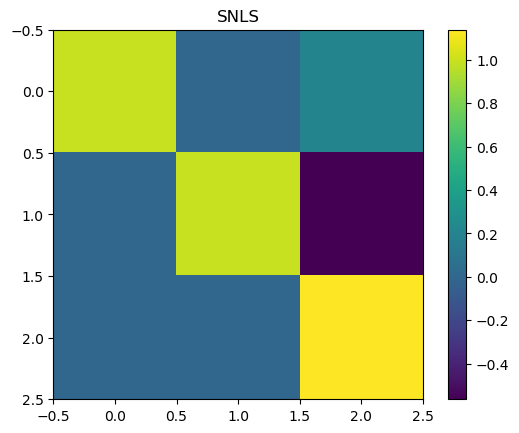

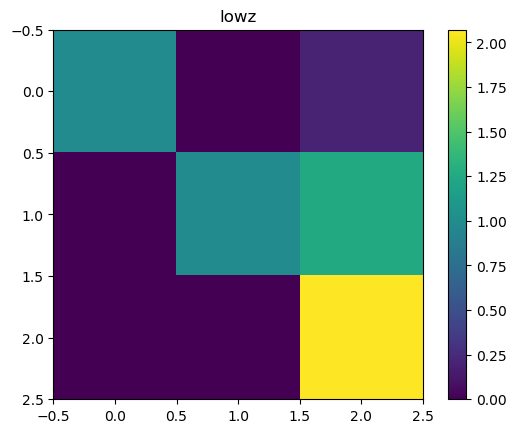

In [14]:
for subset_name, subset in coefs.items():
    arr = np.array([subset['alpha'][1:],
                    subset['beta'][1:],
                    subset['gamma'][1:]])
    plt.imshow(arr)
    plt.colorbar()
    plt.title(subset_name)
    plt.show()

In [15]:
print('Subset   alpha        beta       gamma')
for k, v in coefs.items():
    print('{:<9}{:0.3e}  {:+0.3e}  {:0.3f}'.format(k, *v['gamma'][1:]))

Subset   alpha        beta       gamma
DES      -3.571e-04  -2.360e-07  1.302
PS1      -2.866e-04  -8.573e-07  1.111
SDSS     -1.839e-04  -5.656e-05  1.237
SNLS     -1.243e-04  +1.869e-05  1.140
lowz     -1.823e-04  +2.405e-05  2.072


In [16]:
print('Subset   alpha        beta       gamma')
for k, v in coefs.items():
    print('{:<9}{:0.3f}  {:+0.3e}  {:0.3f}'.format(k, *v['alpha'][1:]))

Subset   alpha        beta       gamma
DES      1.000  -1.995e-05  0.335
PS1      1.000  +1.551e-05  0.135
SDSS     1.000  -1.122e-05  0.125
SNLS     1.000  +5.630e-05  0.203
lowz     1.000  -1.350e-05  0.194


In [17]:
print('Subset   alpha        beta       gamma')
for k, v in coefs.items():
    print('{:<9}{:+0.3e}  {:0.3f}  {:+0.3f}'.format(k, *v['beta'][1:]))

Subset   alpha        beta       gamma
DES      +1.044e-04  0.999  -0.702
PS1      -2.729e-04  0.999  -0.607
SDSS     -2.141e-03  1.000  -0.134
SNLS     -5.190e-04  0.999  -0.565
lowz     +1.408e-03  0.999  +1.258


In [18]:
for k, v in coefs.items():
    print(k)
    for param in ['alpha', 'beta', 'gamma']:
        print('& {:0.3f} & {:0.3f} & {:0.3f} & {:0.3f}'.format(*v[param]))
    print('\\\\')

DES
& 0.000 & 1.000 & -0.000 & 0.335
& 0.001 & 0.000 & 0.999 & -0.702
& 0.000 & -0.000 & -0.000 & 1.302
\\
PS1
& -0.000 & 1.000 & 0.000 & 0.135
& 0.002 & -0.000 & 0.999 & -0.607
& 0.000 & -0.000 & -0.000 & 1.111
\\
SDSS
& 0.000 & 1.000 & -0.000 & 0.125
& 0.002 & -0.002 & 1.000 & -0.134
& 0.000 & -0.000 & -0.000 & 1.237
\\
SNLS
& -0.000 & 1.000 & 0.000 & 0.203
& 0.002 & -0.001 & 0.999 & -0.565
& -0.000 & -0.000 & 0.000 & 1.140
\\
lowz
& 0.000 & 1.000 & -0.000 & 0.194
& 0.003 & 0.001 & 0.999 & 1.258
& -0.000 & -0.000 & 0.000 & 2.072
\\


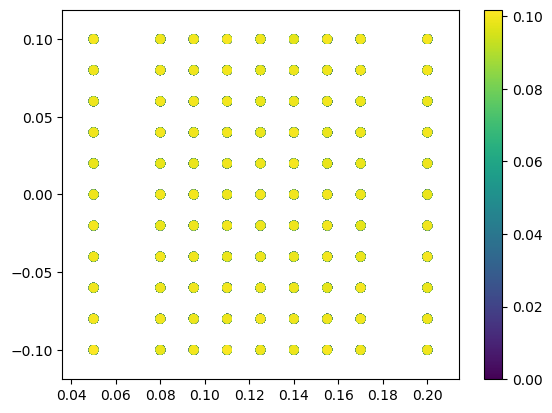

In [19]:
d = data[(data.subset=='PS1')]
plt.scatter(d.alpha, d.gamma, c=d.sig_int_sep)
# plt.xlim(0, 2.5e-4)
# plt.ylim(0, 1e-4)
plt.colorbar()

In [185]:
feature_list = ['alpha_sep', 'beta_sep', 'gamma_sep', 'sig_int_sep']
for subset_name, subset in data.groupby('subset'):
    model = LinearRegression()
    model.fit(subset[feature_list], subset['sig_int'])
    print(model.intercept_, model.coef_)

-0.006813484598433089 [ 3.48943412e-06  4.73858180e-06 -6.23595612e-05  1.08191120e+00]
-0.003120901540749829 [-5.56679119e-06 -2.15671993e-07  1.24855853e-05  1.04500365e+00]
-0.0031329157598884924 [-6.78787053e-05 -9.64665382e-07  2.21044198e-05  1.04440403e+00]
-0.0044425586190849214 [-1.59631805e-05 -8.04946232e-06 -1.13226985e-04  1.06003576e+00]
-0.0059704241061577165 [ 1.50691381e-04 -8.62498127e-06  9.22354979e-05  1.08251461e+00]
